In [3]:
import pandas as pd
import seaborn as sns


## PART 1

In [4]:
# Quiestion 1

diamonds = sns.load_dataset('diamonds')
diamonds.to_pickle('diamonds.pkl')

In [ ]:
# Question 1

diamonds = pd.read_pickle('diamonds.pkl')
diamonds.info()


In [ ]:
# Question 2
diamonds.corr()

In [ ]:
# Question 2

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=diamonds.corr()[['price']].sort_values('price', ascending=False),
            annot=True, cmap='plasma', vmin=-1, vmax=1, fmt='.2f')

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Question 3 and 4

x_train, x_test, y_train, y_test = train_test_split(
    diamonds[['carat', 'table', 'depth']], diamonds[['price']],
    test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)


In [ ]:
# Question 5

model.score(x_test, y_test)

In [ ]:
# Question 6

model.score(x_train, y_train)

In [11]:
# Question 7

y_predicted = model.predict(x_test)

In [ ]:
# Question 8

predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])
final = predicted.join([x_test.reset_index(drop=True),
                       y_test.reset_index(drop=True)])
final[['carat', 'table', 'depth', 'price', 'predictedPrice']]

In [ ]:
# Question 9

final['residuals'] = final.price - final.predictedPrice
final

In [ ]:
# Question 10
plt.figure(figsize=(8,8))
sns.kdeplot(final, x='residuals', fill=True)
plt.show()

In [ ]:
# Question 10

sns.displot(final, x='residuals', kind='kde', height=5, aspect=1.5, fill=True)

## PART 2


In [ ]:
# Question 1

diamonds = pd.read_pickle('diamonds.pkl')
diamonds= diamonds.drop(columns=['x', 'y', 'z'])
diamonds.head()

In [ ]:
# Question 2

diamonds.info()

In [ ]:
# Question 3

categoryColumns = ['cut', 'color', 'clarity']
dummies = pd.get_dummies(diamonds[categoryColumns])
dummies.info()

In [ ]:
# Question 4

diamondDummies = diamonds.drop(columns=categoryColumns)
diamondDummies = diamondDummies.join(dummies)
diamondDummies.info()

In [ ]:
# Question 5
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numcols = ['carat', 'depth', 'table']
diamondDummies[numcols] = scaler.fit_transform(diamondDummies[numcols])
diamondDummies.head()

In [ ]:
# Question 6 - Correlation with corr() function
diamondDummies.corr()[['price']]

In [ ]:
# Question 6 - With Heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=diamondDummies.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.1f')

In [ ]:
# Question 6 - With Heatmap including only price column

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=diamondDummies.corr()[['price']].sort_values('price', ascending=False),
            annot=True, cmap='plasma', vmin=-1, vmax=1, fmt='.2f')

In [57]:
# Question 7

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diamondsTrain, diamondsTest =train_test_split(diamondDummies,
                                               test_size=0.30, random_state=42)

In [ ]:
# Question 8

diammondModel = LinearRegression()
xCols = ['carat', 'clarity_SI2', 'table', 'color_I', 'cut_Premium']
diammondModel.fit(diamondsTrain[xCols], diamondsTrain['price'])

In [ ]:
# Question 9

diammondModel.score(diamondsTest[xCols], diamondsTest['price'])

In [ ]:
# Question 10

diammondModel.score(diamondsTrain[xCols], diamondsTrain['price'])

In [ ]:
# Question 11

diamondPredict = diammondModel.predict(diamondsTest[xCols])
diamondPredict

In [ ]:
# Question 12

diamondsPredicted = pd.DataFrame(diamondPredict, columns=['predictedPrice'])

diamondsFinal = diamondsPredicted.join([diamondsTest[xCols].reset_index(drop=True),
                                        diamondsTest['price'].reset_index(drop=True)])
diamondsFinal[['carat', 'clarity_SI2', 'table', 'color_I', 'cut_Premium', 'price', 'predictedPrice']]

In [ ]:
# Question 13
diamondsFinal['residuals'] = diamondsFinal.price - diamondsFinal.predictedPrice
diamondsFinal

In [ ]:
# Question 14

sns.kdeplot(diamondsFinal, x='residuals', fill=True)

In [ ]:
# Question 14 - Alternative
import numpy as np
import matplotlib.pyplot as plt
sns.displot(diamondsFinal, x='residuals', kind='kde', height=6, aspect=2)
step = 1000
ticks = np.arange(-10000, 9000, step)
plt.xticks(ticks=ticks, rotation=45)
plt.axvline(x=0, color='red', linestyle='solid', label='Low')
plt.show()


## Use Scikit learn to select the most significant independent variables

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
# There are no non-numeric columns in the diamondsDummies DataFrame that have to be dropped before procedding.
diamondDummies.info()

In [75]:
diadiamondsTrain, diamondsTest =train_test_split(diamondDummies,
                                               test_size=0.30, random_state=42)

In [ ]:
fs = SelectKBest(score_func=mutual_info_regression, k=23)
fs.fit(diamondsTrain.drop(columns=['price']), diamondsTrain['price'])

In [102]:
diamondsTrain_fs = fs.transform(diamondsTrain.drop(columns=['price']))
diamondsTest_fs = fs.transform(diamondsTest.drop(columns=['price']))

In [ ]:
model = LinearRegression()
model.fit(diamondsTrain_fs, diamondsTrain['price'])
model.score(diamondsTest_fs, diamondsTest['price'])

In [ ]:
model.score(diamondsTrain_fs, diamondsTrain['price'])

In [ ]:
# Discover the importance/significance of the independent variables

df1 = pd.DataFrame(diadiamondsTrain.drop(columns=['price']).columns, columns=['feature'])
df2 = pd.DataFrame(fs.scores_, columns=['significance'])
significance = df1.join(df2)
significance.sort_values('significance', ascending=False)

In [ ]:
diammondModel = LinearRegression()
xCols = ['carat', 'clarity_VS2', 'clarity_SI1', 'clarity_SI2', 'color_E',
         'color_D', 'color_G', 'color_F', 'cut_Ideal', 'clarity_VVS2',
         'clarity_VS1', 'clarity_VVS1', 'color_H', 'table', 'cut_Premium', 'depth']
diammondModel.fit(diamondsTrain[xCols], diamondsTrain['price'])

In [ ]:
diammondModel.score(diamondsTest[xCols], diamondsTest['price'])

In [ ]:
diammondModel.score(diamondsTrain[xCols], diamondsTrain['price'])

In [115]:
price_predicted = diammondModel.predict(diamondsTest[xCols])

In [118]:
predicted = pd.DataFrame(price_predicted, columns=['predictedPrice'])
final = predicted.join([diamondsTest[xCols].reset_index(drop=True),
                        diamondsTest['price'].reset_index(drop=True)])
final['residuals'] = final.price - final.predictedPrice
final[['price', 'predictedPrice', 'residuals']]

,price,predictedPrice,residuals
0,559,455.118505,103.881495
1,2201,3393.217838,-1192.217838
2,1238,2012.754908,-774.754908
3,1304,2189.547107,-885.547107
4,6901,9744.475730,-2843.475730
...,...,...,...
16177,705,559.906229,145.093771
16178,5278,5640.706265,-362.706265
16179,13157,10440.675172,2716.324828
16180,2960,4384.273997,-1424.273997


<Axes: xlabel='residuals', ylabel='Density'>

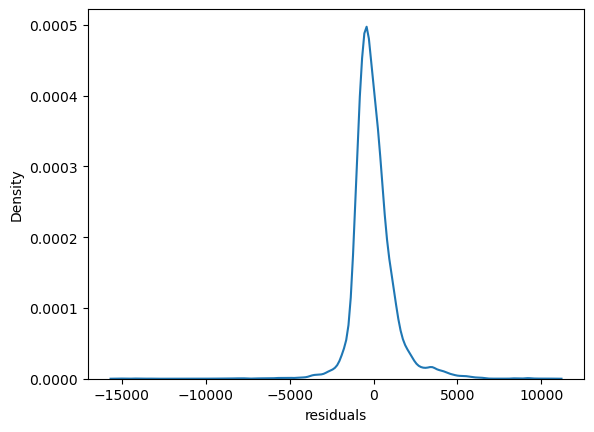

In [119]:
sns.kdeplot(final, x='residuals')

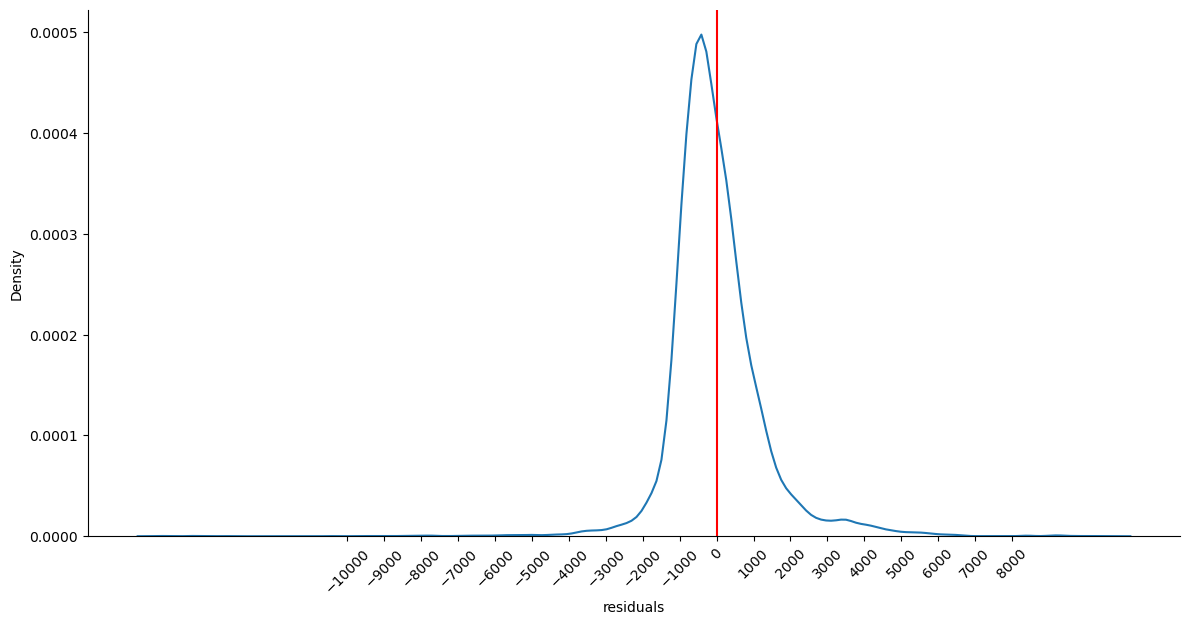

In [121]:
import numpy as np
import matplotlib.pyplot as plt
sns.displot(final, x='residuals', kind='kde', height=6, aspect=2)
step = 1000
ticks = np.arange(-10000, 9000, step)
plt.xticks(ticks=ticks, rotation=45)
plt.axvline(x=0, color='red', linestyle='solid', label='Low')
plt.show()

## Selecting the right number of independent variables

In [ ]:
# Question 15

import numpy as np
model = LinearRegression()
test = []
train =[]

for i in range(1, len(diamondsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(diamondsTrain.drop(columns=['price']), diamondsTrain['price'])

    diamondsTrain_fs = fs.transform(diamondsTrain.drop(columns=['price']))
    diamondsTest_fs = fs.transform(diamondsTest.drop(columns=['price']))

    model.fit(diamondsTrain_fs, diamondsTrain['price'])

    testScore = model.score(diamondsTest_fs, diamondsTest['price'])
    trainScore = model.score(diamondsTrain_fs, diamondsTrain['price'])
    test.append(testScore)
    train.append(trainScore)

df = pd.DataFrame(data={'testScores': test, 'trainScores': train})
df.reset_index(inplace=True)
df.rename(columns={'index': 'numVariables'}, inplace=True)
df.numVaribles = df.numVariables + 1
ax = df.plot(x='numVariables', y=['testScores', 'trainScores'], figsize=(10, 10))
plt.axhline(y=0.913, color='yellow', linestyle='--', label='0.913')
plt.axvline(x=16, color='green', linestyle='--')
plt.xticks(np.arange(0, 20, step=1))
plt.show()